In [1]:
import numpy as np 
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline 

/Users/bigd/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [12]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-4-10')['Adj Close']

In [13]:
log_returns = np.log(1 + data.pct_change())

In [14]:
log_returns.tail()

,PG
Date,
2017-04-04,0.002561
2017-04-05,0.000667
2017-04-06,-0.006355
2017-04-07,-0.001903
2017-04-10,0.002910


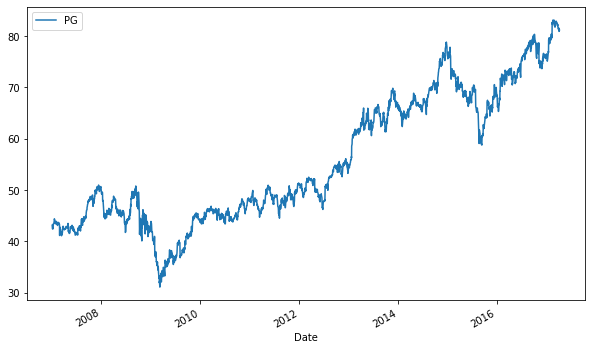

In [15]:
data.plot(figsize=(10,6));

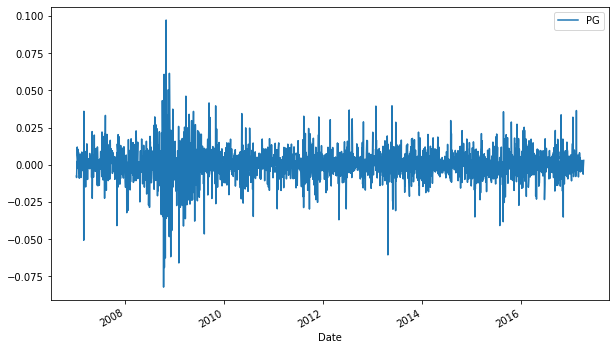

In [16]:
log_returns.plot(figsize=(10,6))

In [ ]:
# getting their Mean and Variance 

In [18]:
u = log_returns.mean()
u

PG    0.000244
dtype: float64

In [19]:
var = log_returns.var()
var

PG    0.000124
dtype: float64

 # drift= ü – 1⁄2 · var

In [ ]:
#use drift to get the best approximation of future rate of return of the stock to predicting daliy price not annual 

In [20]:
drift = u - (0.5 * var)
drift

PG    0.000182
dtype: float64

In [21]:
stdev = log_returns.std()
stdev

PG    0.011138
dtype: float64

In [22]:
type(drift)

pandas.core.series.Series

In [23]:
type(stdev)

pandas.core.series.Series

In [ ]:
#convert the values into numpy arraies 

In [24]:
np.array(drift)

array([0.00018233])

In [25]:
drift.values #.values and transfer the object inot numpy array

array([0.00018233])

In [26]:
stdev.values # strandaard deivation 

array([0.01113811])

In [27]:
norm.ppf(0.95) # .95 is % of the evernt occuring is the deviation

1.6448536269514722

In [42]:
x = np.random.rand(10,2) # need to be randomize by having two arughments (10,2)
x

array([[0.5473735 , 0.5673834 ],
       [0.87807024, 0.09659215],
       [0.93472532, 0.85970926],
       [0.95956719, 0.52594881],
       [0.21536215, 0.9697034 ],
       [0.18339251, 0.98225851],
       [0.88027885, 0.46430268],
       [0.54368161, 0.90789876],
       [0.49948706, 0.64374046],
       [0.48060649, 0.56024869]])

In [43]:
norm.ppf(x)

array([[ 1.19028226e-01,  1.69716357e-01],
       [ 1.16539406e+00, -1.30121669e+00],
       [ 1.51193906e+00,  1.07901403e+00],
       [ 1.74568545e+00,  6.50899552e-02],
       [-7.87952821e-01,  1.87645226e+00],
       [-9.02511874e-01,  2.10280323e+00],
       [ 1.17638188e+00, -8.95996413e-02],
       [ 1.09713261e-01,  1.32792624e+00],
       [-1.28573947e-03,  3.68475010e-01],
       [-4.86314800e-02,  1.51599768e-01]])

In [36]:
# z is corresponds to the distnace between mena and the events, expressed as the number of standard deviations
# showing the distance form the mean zero by number of standard deviations

In [44]:
Z = norm.ppf(np.random.rand(10,2)) 
Z

array([[ 0.09579976,  0.45404982],
       [-1.90649869, -0.08675971],
       [ 0.14480184, -0.64102266],
       [ 1.67435481, -1.11633158],
       [ 0.71888108, -0.12636586],
       [-1.10879348,  0.61634286],
       [-0.21483834, -0.97509118],
       [ 0.30185999,  0.81278054],
       [ 0.11560219,  1.3214388 ],
       [ 0.32501103, -0.95713146]])

In [ ]:
# Forecasting the upcoming 1000 days of stock PG, produce ten series of stock predictions

In [45]:
t_intervals = 1000
iterations = 10

                #                  daliy_returns = e^R
                         #        r = drift+ stdev • ž

In [47]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [48]:
daily_returns

array([[1.00926685, 0.99965525, 1.00302213, ..., 1.0147225 , 0.98157635,
        0.99706435],
       [1.00066601, 0.99211166, 0.99832826, ..., 0.99776677, 1.00019778,
        0.99730288],
       [1.0095703 , 0.99445845, 0.99921831, ..., 0.97929752, 1.00420717,
        0.99702977],
       ...,
       [1.00483098, 1.00094357, 0.99844005, ..., 1.01987081, 0.98780015,
        0.99094664],
       [1.01241999, 0.99787466, 1.01855363, ..., 1.01997671, 0.9914512 ,
        1.01267206],
       [0.99536482, 0.98179733, 0.98825715, ..., 1.00413221, 0.99326562,
        1.00445002]])

# S+ = So • daliy)returnt
# st+1 = St • daily_returnt+1
#st+9999 = St+998• daily_returnt+999

In [ ]:
# creating a price list of prize must equal the product of the obseved previous day and simulated deily return
# and repeat 1000 times

In [49]:
S0 = data.iloc[-1] # today stocks/ current stock price
S0

PG    81.148872
Name: 2017-04-10 00:00:00, dtype: float64

In [ ]:
# how big used  it be ?

In [50]:
price_list = np.zeros_like(daily_returns)

In [51]:
price_list #using the daliy returns array and replace with zeros by using a loop

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
price_list[0] = S0
price_list

array([[81.14887238, 81.14887238, 81.14887238, ..., 81.14887238,
        81.14887238, 81.14887238],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
# creatig a loop that begins in day 1 and ends at day 1000

In [53]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [54]:
price_list

array([[ 81.14887238,  81.14887238,  81.14887238, ...,  81.14887238,
         81.14887238,  81.14887238],
       [ 81.20291834,  80.50874213,  81.01321239, ...,  80.96764852,
         81.16492238,  80.93000408],
       [ 81.98005486,  80.06259904,  80.94988511, ...,  79.29141778,
         81.50639737,  80.68962367],
       ...,
       [ 51.39568302,  55.68849208, 126.92477772, ...,  92.42478073,
        176.21484815,  85.40586309],
       [ 52.03401706,  55.5701353 , 129.27969357, ...,  94.27112333,
        174.70842189,  86.48813092],
       [ 51.79282979,  54.55861032, 127.76158148, ...,  94.66067101,
        173.53186962,  86.87300501]])

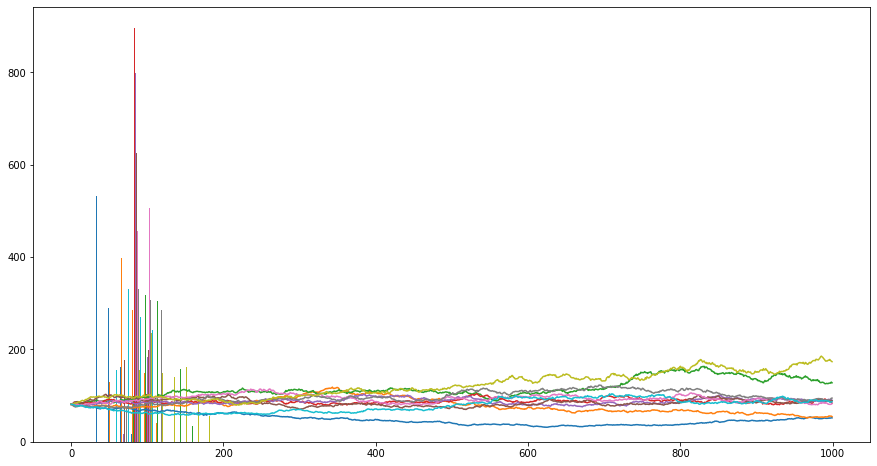

In [59]:
plt.figure(figsize=(15,8))
plt.plot(price_list);

([array([532., 290., 161.,  17.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([  0., 129., 397., 286., 148.,  40.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0., 100., 317., 306.,  85., 158.,  34.,   0.]),
  array([  0.,   0.,   0., 897., 103.,   0.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,  17., 799., 184.,   0.,   0.,   0.,   0.,   0.]),
  array([  0.,   0., 177., 625., 198.,   0.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0., 456., 506.,  38.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,  74., 332., 308., 286.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0., 155., 235., 150., 141., 161., 103.,  55.]),
  array([  0., 156., 332., 270., 242.,   0.,   0.,   0.,   0.,   0.])],
 array([ 31.46986069,  46.87349722,  62.27713375,  77.68077028,
         93.08440681, 108.48804334, 123.89167987, 139.2953164 ,
        154.69895293, 170.10258946, 185.50622599]),
 <a list of 10 Lists of Patches objects>)

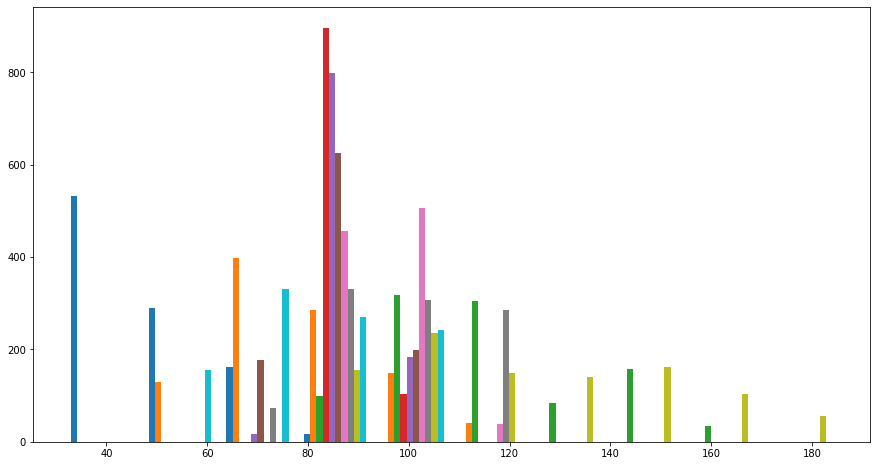

In [61]:
plt.figure(figsize=(15,8))
plt.hist(price_list)
